# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

**Project Goal**

* The goal of this project is to determine which factors influence the price of a car. 
* In order to achieve this goal, I will first process the data to ensure it is ready for analysis. This will include looking for and cleaning up missing values and conducting some initial calculations to make sure we can compare the data points accurately to look for correlation. 
* After the data has been cleaned up, I will look at the relationship between the price the vehicle and other characteristics to look at what influences the price.

**Project Plan**
* First I will examine the data to ensure it is ready for analysis. This will include looking and dealing with missing data and checking for duplicates.
* I will ensure all the data is the correct type and ready for analysis.
* I will analyze the data to look at the relationship between price and the conditions: transmission, paint color, condition, average mileage and vehicle age. 

## Initialization

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
if not sys.warnoptions:
        warnings.simplefilter("ignore");

# Loads all the libraries


### Load data

In [190]:
car_data = pd.read_csv('/datasets/vehicles_us.csv')

# Loads the data file into a DataFrame

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [191]:
car_data.info() # Prints the general/summary information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**Initial observations**
* The following columns contain missing data that needs to be further investigated: model_year, cylinders, paint_color, is_4wd. 
* Some of the columns that are float type may need be converted (ex. model_year) - this should be further investigated. 

In [192]:
car_data.head(10) # Prints a sample of data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


**Initial observations**
* The following columns are float types and should be converted to a different integers: model_year, cylinder, odometer
* The column date_posted may need to be converted into a data time object.
* It looks like the missing data in the is_4wd column may represent "False", but this needs to be further investigated. 

In [193]:
car_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


**Initial observations**
* Price has a large range, with significant variance in the data (per the large standard deviation). The mean is significantly higher than the median, indicating there may be signifiant outliers.
* This confirms that model year needs to be converted to an integer type, since we don't want to return part of a year. It looks although the minimum year is 1908,  the majority of years cluster in the early to mid-2000s.
* The most common number of cylinders is 6 which is both the mean and the median. 
* This confirms that I will want to convert the is_4wd from float type to an integer type.  
* This confirms that the "is_4wd" column is binary and consists of all 1s. This means the data is either 1 or NaN. This means we can assume the NaNs means 0 or "false". 

In [194]:
car_data.isna().sum()

car_data.isna().sum() / len(car_data) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

**Initial observations**
* The following columns contain missing data that needs to be further investigated: model_year, cylinders, paint_color, is_4wd. 
* Is_4wd contains the most missing data (50%)

### Conclusions and further steps

* The following columns are float types and should be converted to integers: model_year, cylinder, odometer.
* The following columns contain missing data that needs to be further investigated to decide whether values need to be dropped or replaced: model_year, cylinders, paint_color, is_4wd. 
* Is_4wd contains the most missing data (50%). This is a binary value where NaN could be treated as '0' or 'False'. 

**Checking for Duplicates**

In [195]:
car_data.duplicated().sum() # Checks the dataframe for duplicate rows

0

There are no duplicates in the dataframe. 

## Treat missing values (if any)

**Addressing Missing Values: Four Wheel Drive**

In [196]:
car_data['is_4wd'].isna().sum()

car_data['is_4wd'].isna().sum() / len(car_data) * 100

# Looks at number and percentage of missing values in the 'is_4wd' column

50.36972343522562

In [197]:
car_data['is_4wd'].unique() # Checks the unique values in the 'is_4wd' column

array([ 1., nan])

In [198]:
car_data['is_4wd'] = car_data['is_4wd'].fillna(0)

car_data.head()

# Fills the null values in 'is_4wd' with '0' then prints the table to make sure it worked

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [199]:
car_data['is_4wd'].isna().sum()

# Checks to make sure there are no more null values in this column

0

**Observations and actions taken for missing values: 'is_4wd'**
* The missing data took up 50% of the data.
* The 'is_4wd' column has only binary data. 
* Therefore, we could assume that the missing data represents '0' or 'False' (aka the car is not 4wd)
* Based on this assumption, I replaced the NaN values with '0'

**Addressing Missing Values: Paint Color**

In [200]:
car_data['paint_color'].isna().sum() # Looks at number of missing values 

car_data['paint_color'].isna().sum() / len(car_data) * 100 # Looks at percentage of missing values 

17.985443959243085

In [201]:
car_data['paint_color'].unique() # Looks at unique values 

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [202]:
car_data_paint_na = car_data.loc[car_data['paint_color'].isna()] # Creates a filtered table with only rows that have missing values in the 'paint_color' column

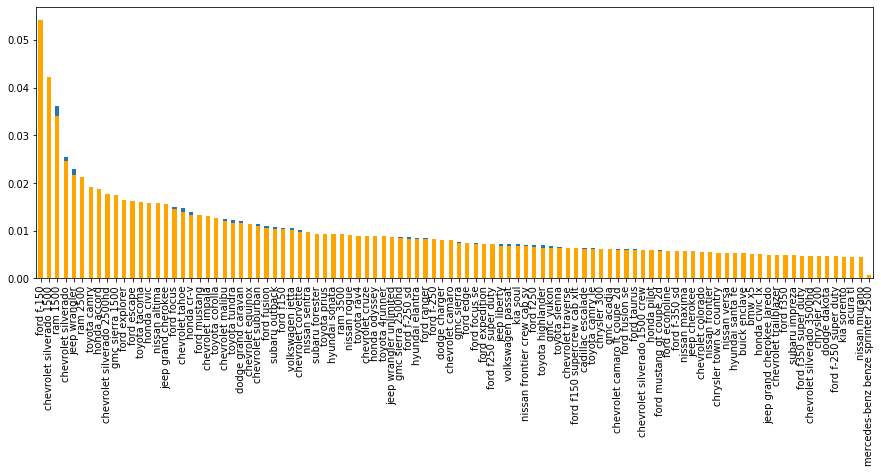

In [203]:
car_data_paint_na['model'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

car_data['model'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5));

# Looks at the distribution of the missing data compared to the larger dataset.

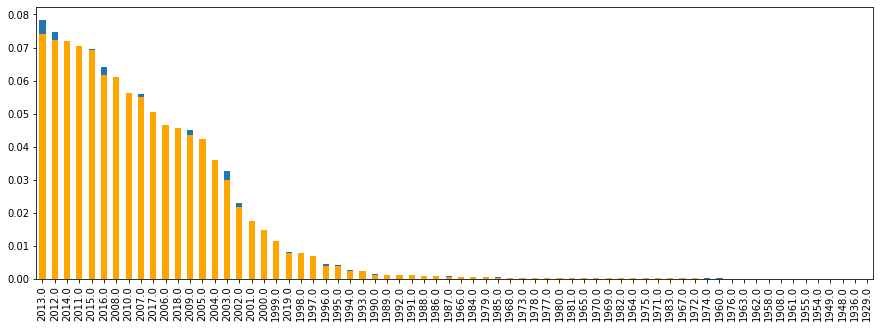

In [204]:
car_data_paint_na['model_year'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

car_data['model_year'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5));

# Looks at the distribution of the missing data compared to the larger dataset.

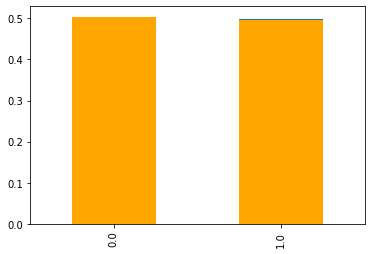

In [205]:
car_data_paint_na['is_4wd'].value_counts(normalize=True).plot(kind='bar');

car_data['is_4wd'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset.

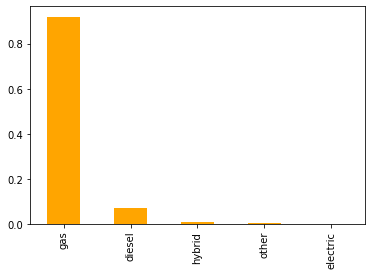

In [206]:
car_data_paint_na['fuel'].value_counts(normalize=True).plot(kind='bar');

car_data['fuel'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset.

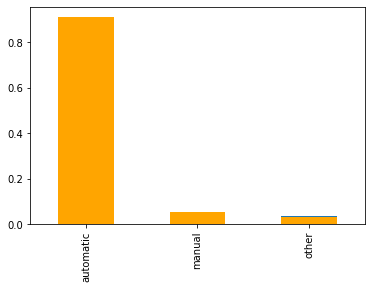

In [207]:
car_data_paint_na['transmission'].value_counts(normalize=True).plot(kind='bar');

car_data['transmission'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset

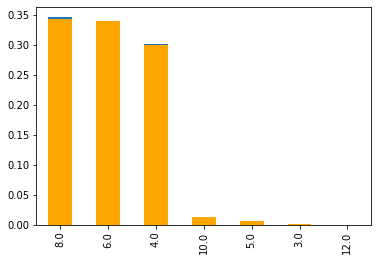

In [208]:
car_data_paint_na['cylinders'].value_counts(normalize=True).plot(kind='bar');

car_data['cylinders'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset

In [209]:
car_data['paint_color'] = car_data['paint_color'].fillna('unknown') # Fills the NaN values in the cylinders column with the median: 6

car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [210]:
car_data['paint_color'].isna().sum() # Checks that there are no longer any missing values in the 'paint_color' column

car_data['paint_color'].unique() # Checks the unknown has been added to the 'paint_color' column

car_data['paint_color'].value_counts() / len(car_data) * 100

white      19.464338
unknown    17.985444
black      14.928675
silver     12.118389
grey        9.775837
blue        8.685104
red         8.580301
green       2.709364
brown       2.373605
custom      2.237749
yellow      0.494905
orange      0.448326
purple      0.197962
Name: paint_color, dtype: float64

**Observations and actions taken for missing values in paint color:**
* The distribution of the missing values is similar to that of the larger dataset. 
* The missing values make up 17% of the data so I do not want to drop those rows. 
* Based on the distribution across the current colors, we could assume the cars are likely to be white or black. There is no way to know that that's true though, so I replaced the NaN values with 'unknown'

**Addressing Missing Values: Odometer**

In [211]:
car_data['odometer'].isna().sum() # Looks at number of missing values 

car_data['odometer'].isna().sum() / len(car_data) * 100 # Looks at percentage of missing values 

15.316836487142163

In [212]:
car_data_odometer_na = car_data.loc[car_data['odometer'].isna()] # Creates a filtered table with only rows that have missing values in the 'odometer' column

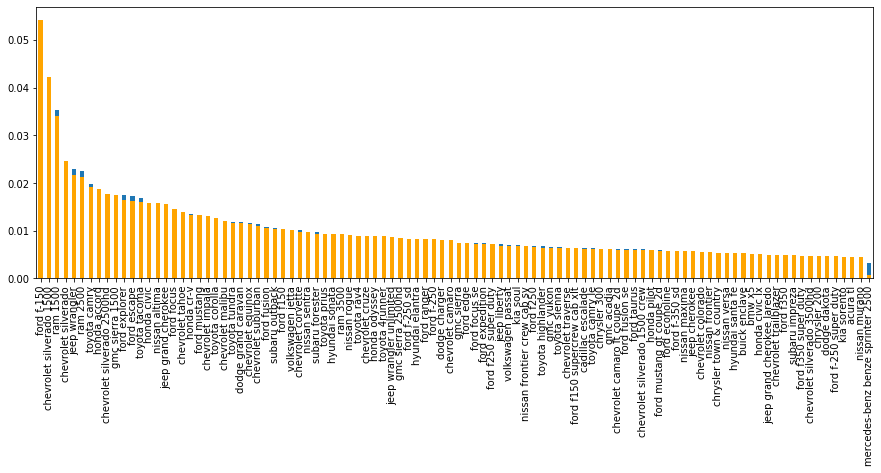

In [213]:
car_data_odometer_na['model'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

car_data['model'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5));

# Looks at the distribution of the missing data compared to the larger dataset.

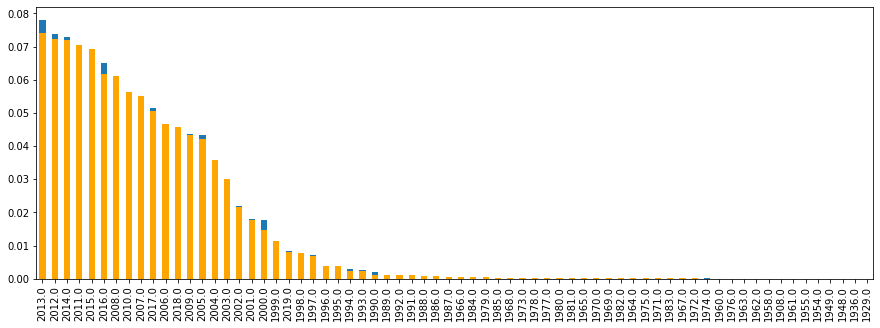

In [214]:
car_data_odometer_na['model_year'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

car_data['model_year'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5));

# Looks at the distribution of the missing data compared to the larger dataset.

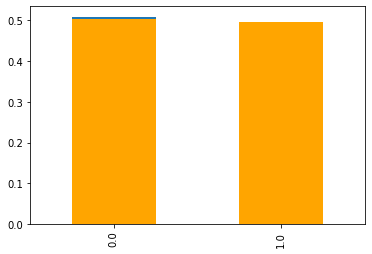

In [215]:
car_data_odometer_na['is_4wd'].value_counts(normalize=True).plot(kind='bar');

car_data['is_4wd'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset

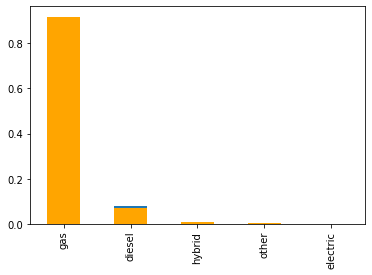

In [216]:
car_data_odometer_na['fuel'].value_counts(normalize=True).plot(kind='bar');

car_data['fuel'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset

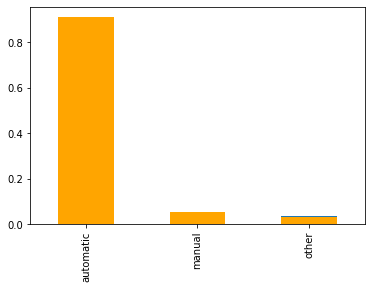

In [217]:
car_data_odometer_na['transmission'].value_counts(normalize=True).plot(kind='bar');

car_data['transmission'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset

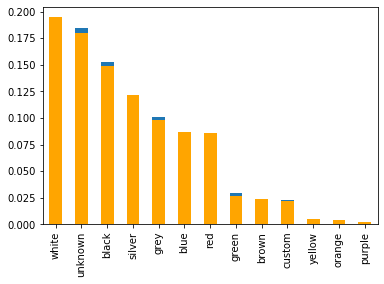

In [218]:
car_data_odometer_na['paint_color'].value_counts(normalize=True).plot(kind='bar');

car_data['paint_color'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset

In [219]:
car_data['odometer'].mean() # Finds the mean

car_data['odometer'].median() # Finds the median to compare to the mean

113000.0

In [220]:
car_data['odometer'] = car_data['odometer'].fillna(113000) # Fills the NaN values in the odometer column with the median: 6

car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [221]:
car_data['odometer'].isna().sum() # Checks is there are any missing values left in this column

0

**Observations and actions taken for missing values in odometer:**
* The distribution of the missing values is similar to that of the larger dataset. 
* The mean (115,425) is slightly larger than the median (113,000), indicating there may be some high outliers. 
* The missing values make up 15% of the data so I do not want to drop these rows. 
* Therefore, I filled in the missing values with the median (113,000). The missing values only make up 10% of the dataset so this won't impact the analysis. 

**Addressing the missing values: cylinders**

In [222]:
car_data['cylinders'].isna().sum() # Looks at number of missing values 

car_data['cylinders'].isna().sum() / len(car_data) * 100 # Looks at percentage of missing values 

10.208636584182436

In [223]:
car_data['cylinders'].unique() # Looks at list of unique values 

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [224]:
car_data_cylinders_na = car_data.loc[car_data['cylinders'].isna()] # Creates a filtered table with only rows that have missing data in the 'cylinders' column

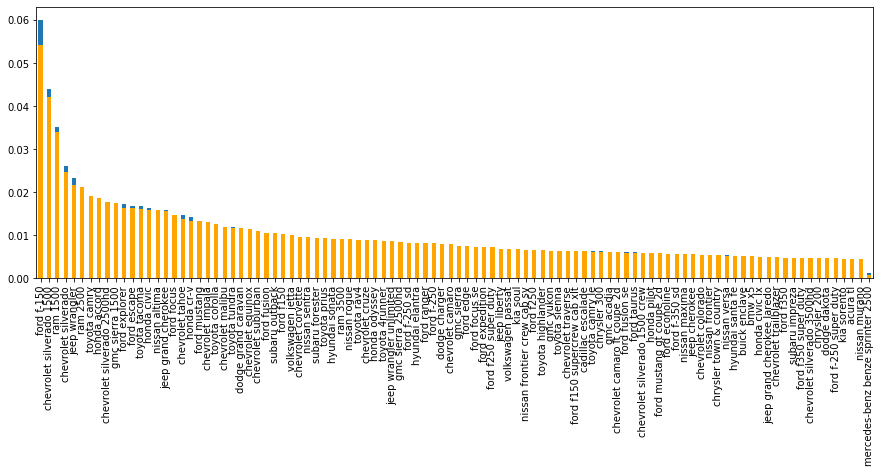

In [225]:
car_data_cylinders_na['model'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

car_data['model'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5));

# Looks at the distribution of the missing data compared to the larger dataset.

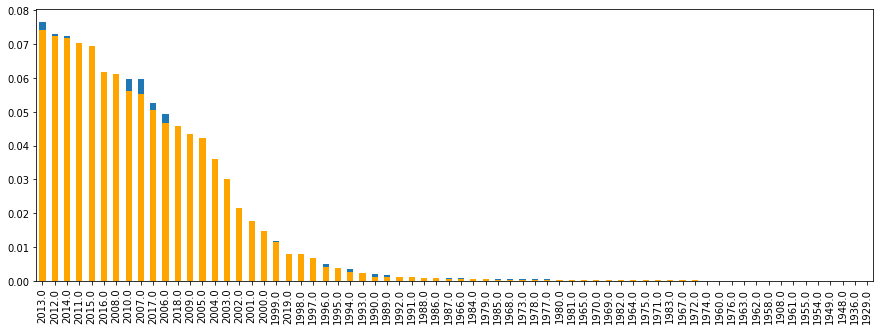

In [226]:
car_data_cylinders_na['model_year'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

car_data['model_year'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5));

# Looks at the distribution of the missing data compared to the larger dataset.

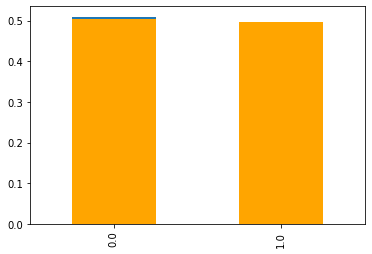

In [227]:
car_data_cylinders_na['is_4wd'].value_counts(normalize=True).plot(kind='bar');

car_data['is_4wd'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset

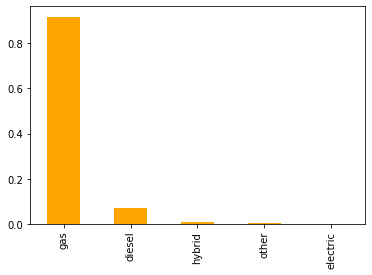

In [228]:
car_data_cylinders_na['fuel'].value_counts(normalize=True).plot(kind='bar');

car_data['fuel'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset

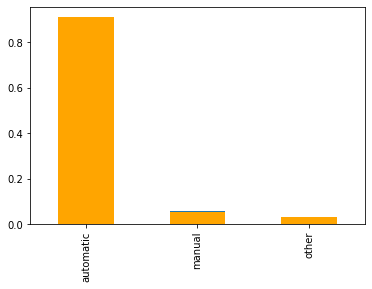

In [229]:
car_data_cylinders_na['transmission'].value_counts(normalize=True).plot(kind='bar');

car_data['transmission'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset

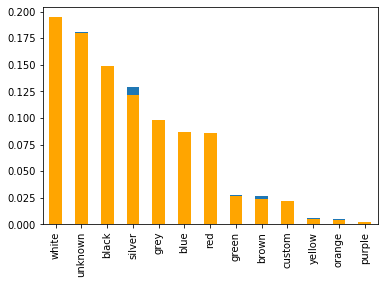

In [230]:
car_data_cylinders_na['paint_color'].value_counts(normalize=True).plot(kind='bar');

car_data['paint_color'].value_counts(normalize=True).plot(kind='bar', color='orange');

# Looks at the distribution of the missing data compared to the larger dataset

In [231]:
car_data['cylinders'].sort_values().unique() # Looks at all of the unique values in the cylinders column

car_data['cylinders'].mean() # Finds the mean

car_data['cylinders'].median() # Finds the median to compare to the mean

6.0

In [232]:
car_data['cylinders'] = car_data['cylinders'].fillna(6) # Fills the NaN values in the cylinders column with the median: 6


In [233]:
#car_data['cylinders'] = car_data.groupby('model')['cylinders'].transform(lambda grp: grp.fillna(np.median(grp))) # Creates a variable that fills in the cylinders according to model and type

In [234]:
car_data['cylinders'].isna().sum() # Checks to make sure there are no longer any NaN values in the cylinder column

0

In [235]:
car_data.head(100).sort_values(by='cylinders')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
49,3200,2006.0,honda civic,excellent,4.0,gas,255390.0,automatic,sedan,blue,0.0,2018-10-18,23
51,3800,2012.0,ford focus,good,4.0,gas,130323.0,automatic,sedan,black,0.0,2018-11-29,261
70,5500,2006.0,honda accord,good,4.0,gas,113000.0,automatic,sedan,silver,0.0,2018-11-27,15
68,6950,2013.0,nissan altima,excellent,4.0,gas,158786.0,automatic,sedan,unknown,0.0,2018-12-24,41
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,unknown,0.0,2018-09-13,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29800,2012.0,chevrolet corvette,excellent,8.0,gas,57413.0,automatic,coupe,orange,0.0,2018-10-22,101
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
67,14950,2012.0,ram 1500,excellent,8.0,gas,114773.0,automatic,truck,grey,1.0,2019-04-09,85
15,17990,2013.0,ram 1500,excellent,8.0,gas,113000.0,automatic,pickup,red,1.0,2018-05-15,111


**Observations and actions taken for missing values in cylinders:**
* The distribution of the missing values is similar to that of the larger dataset. 
* The mean and median number of cylinders is 6. 
* Therefore, I filled in the missing values with '6'. The missing values only make up 10% of the dataset so this won't impact the analysis. 

**Addressing missing values: Model_year**

In [236]:
car_data['model_year'].isna().sum()

car_data['model_year'].isna().sum() / len(car_data) * 100

7.023774866569626

In [237]:
car_data['model_year'].value_counts().unique() # Looks at unique values in model year

array([3549, 3468, 3448, 3375, 3323, 2954, 2924, 2691, 2643, 2419, 2234,
       2193, 2079, 2025, 1722, 1437, 1037,  845,  709,  546,  380,  378,
        327,  189,  184,  118,  108,   58,   57,   51,   40,   39,   31,
         23,   20,   19,   18,   16,   15,   13,   12,   10,    9,    7,
          5,    4,    3,    2,    1])

In [238]:
car_data_modelyear_na = car_data.loc[car_data['model_year'].isna()] # Creates a filtered table with only rows that have missing data in the 'model_year' column

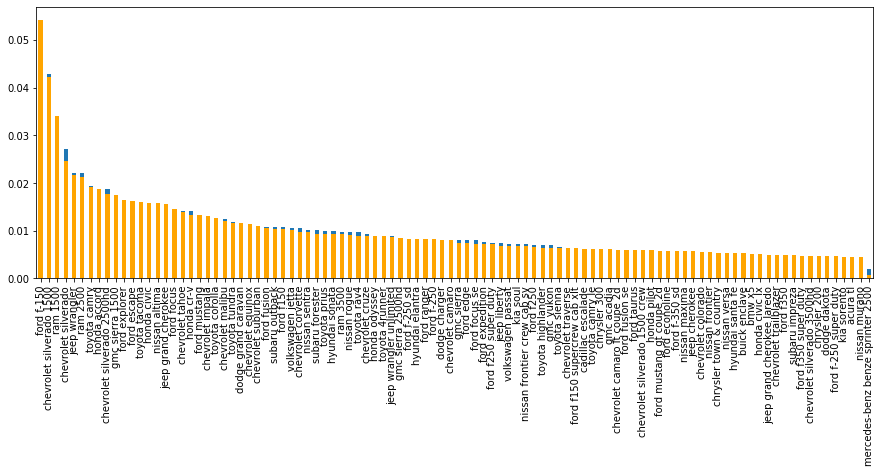

In [239]:
car_data_modelyear_na['model'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

car_data['model'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5));

# Looks at the distribution of the missing data in 'model_year' across car model compared to the larger dataset.

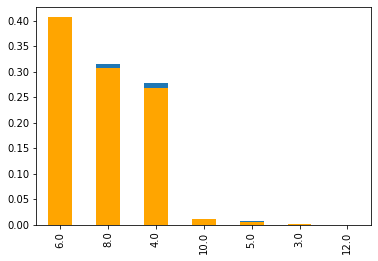

In [240]:
car_data_modelyear_na['cylinders'].value_counts(normalize=True).plot(kind='bar');

car_data['cylinders'].value_counts(normalize=True).plot(kind='bar', color='orange');

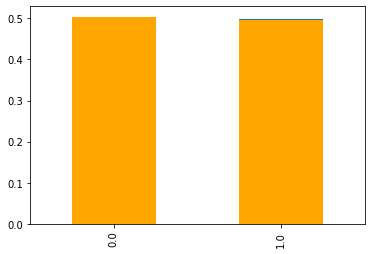

In [241]:
car_data_modelyear_na['is_4wd'].value_counts(normalize=True).plot(kind='bar');

car_data['is_4wd'].value_counts(normalize=True).plot(kind='bar', color='orange');

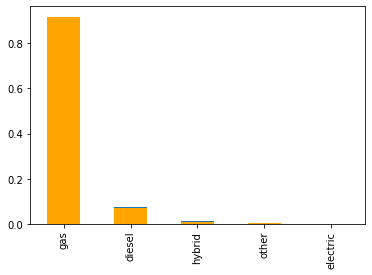

In [242]:
car_data_modelyear_na['fuel'].value_counts(normalize=True).plot(kind='bar');

car_data['fuel'].value_counts(normalize=True).plot(kind='bar', color='orange');

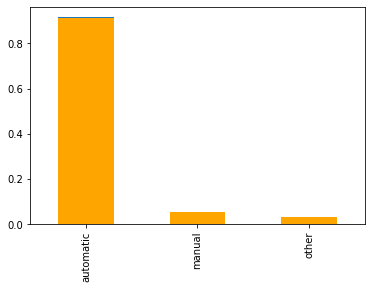

In [243]:
car_data_modelyear_na['transmission'].value_counts(normalize=True).plot(kind='bar');

car_data['transmission'].value_counts(normalize=True).plot(kind='bar', color='orange');

In [244]:
car_data.dropna(subset=['model_year'], inplace = True) # Drops of the rows where NaN is present in the model_year column.

car_data['model_year'].isna().sum() # Checks to make sure there are no longer NaN values in the model_year column.

car_data.shape # Checks to make sure the rows were dropped from the overall dataframe

(47906, 13)

**Observations and actions taken for missing values in model_year:**
* The distribution of the missing values is similar to that of the larger dataset.
* The missing values only make up 7% of the dataset. 
* There was no  way to determine or make assumptions around what these values are. Therefore, I dropped the rows with missing data in model_year from the dataset. 

**Checking Missing Values in the Entire Dataset**

In [245]:
car_data.isna().sum() # Checks for missing values in the dataframe

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

**Summary of Missing Values**

Rows with missing values in the 'model_year' column were dropped.

Replaced the following missing values:
* In 'is_4wd' with '0' (indicating the car is not 4wd)
* In 'paint_color' with 'unknown'
* In 'odometer' with the median (113,000)
* In 'cylinders' with the median (6)

## Fix data types

**Fixed data types**
* Converted model_year, cylinders, odometer and is_4wd columns from floats to integer types.
* Converted the date_posted column to a datetimeobject. 

In [246]:
car_data.info()

car_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
price           47906 non-null int64
model_year      47906 non-null float64
model           47906 non-null object
condition       47906 non-null object
cylinders       47906 non-null float64
fuel            47906 non-null object
odometer        47906 non-null float64
transmission    47906 non-null object
type            47906 non-null object
paint_color     47906 non-null object
is_4wd          47906 non-null float64
date_posted     47906 non-null object
days_listed     47906 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [247]:
car_data[['model_year', 'cylinders', 'odometer', 'is_4wd']] = car_data[['model_year', 'cylinders', 'odometer', 'is_4wd']].astype('int64') # Converts the data type from float to interger for the named columns

In [248]:
car_data.info()

car_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
price           47906 non-null int64
model_year      47906 non-null int64
model           47906 non-null object
condition       47906 non-null object
cylinders       47906 non-null int64
fuel            47906 non-null object
odometer        47906 non-null int64
transmission    47906 non-null object
type            47906 non-null object
paint_color     47906 non-null object
is_4wd          47906 non-null int64
date_posted     47906 non-null object
days_listed     47906 non-null int64
dtypes: int64(6), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15


In [249]:
# Add datetime values for when the ad was placed

car_data['date_posted_new'] = pd.to_datetime(car_data['date_posted'], format='%Y-%m-%d') # Adds a new column that converts the 'date_posted' data to a datetime type

car_data.head() # Checks to make sure the new column was added

car_data.info() # Checks to make sure the new column is a datetime type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 14 columns):
price              47906 non-null int64
model_year         47906 non-null int64
model              47906 non-null object
condition          47906 non-null object
cylinders          47906 non-null int64
fuel               47906 non-null object
odometer           47906 non-null int64
transmission       47906 non-null object
type               47906 non-null object
paint_color        47906 non-null object
is_4wd             47906 non-null int64
date_posted        47906 non-null object
days_listed        47906 non-null int64
date_posted_new    47906 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(7)
memory usage: 5.5+ MB


## Enrich data

**Additional data preparation**
* Added the following columns: year, month and day of the week the ad was posted.
* Calculated the car's age and mileage by year.
* Created categories for the condition column.

In [250]:
# Add the vehicle's age when the ad was placed

car_data['date_posted_year'] = car_data['date_posted_new'].dt.year # Creates a new column that extracts the year from the date posted and converts that type to integers

In [251]:
car_data['date_posted_month'] = car_data['date_posted_new'].dt.month # Creates a new column that extracts the month from the date posted and converts that type to integers 

In [252]:
car_data['date_posted_weekday'] = car_data['date_posted_new'].dt.weekday # Creates a new column that extracts the day of the week from the date posted and converts that type to integers

car_data.info() # Checks to make sure columns were added with appropriate data types

car_data.head() # Checks table to make sure columns were added appropriately

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 17 columns):
price                  47906 non-null int64
model_year             47906 non-null int64
model                  47906 non-null object
condition              47906 non-null object
cylinders              47906 non-null int64
fuel                   47906 non-null object
odometer               47906 non-null int64
transmission           47906 non-null object
type                   47906 non-null object
paint_color            47906 non-null object
is_4wd                 47906 non-null int64
date_posted            47906 non-null object
days_listed            47906 non-null int64
date_posted_new        47906 non-null datetime64[ns]
date_posted_year       47906 non-null int64
date_posted_month      47906 non-null int64
date_posted_weekday    47906 non-null int64
dtypes: datetime64[ns](1), int64(9), object(7)
memory usage: 6.6+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_new,date_posted_year,date_posted_month,date_posted_weekday
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018-06-23,2018,6,5
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019-02-07,2019,2,3
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,0,2019-03-22,9,2019-03-22,2019,3,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019-04-02,2019,4,1
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2018-06-20,2018,6,2


In [253]:
car_data['vehicle_age'] = car_data['date_posted_year'] - car_data['model_year'] # Calculates the age of the car 

car_data['vehicle_age'] = car_data['vehicle_age'].astype('int64')

In [254]:
car_data['avg_mileage'] = car_data['odometer'] / car_data['vehicle_age'].where(car_data['vehicle_age'] > 0) # Adds the vehicle's average mileage per year

car_data['avg_mileage'] = car_data['avg_mileage'].round(0) # Rounds the average mileage per year

car_data.head()

car_data['avg_mileage'].describe()

count     45778.000000
mean      18588.772926
std       15325.083363
min           0.000000
25%       10286.000000
50%       14948.000000
75%       21875.000000
max      279365.000000
Name: avg_mileage, dtype: float64

In [255]:
car_data['avg_mileage'].isna().sum() # Looks at the number of null values in the new avg_mileage column

car_data['avg_mileage'] = car_data['avg_mileage'].fillna(0) # Fills the null values with 0

car_data['avg_mileage'].isna().sum() # Checks to make sure the null values are filled

0

**Enriching the Condition Column**

In [256]:
car_data['condition'].unique() # Checks all of the unique values in the condition column

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [257]:
# It might help to replace the condition values with something that can be manipulated more easily

def condition_new(row): # Creates a function that replaces the values in the column condition with values 
    condition = row['condition']
    if condition == 'new':
        return '5'
    elif condition == 'like new':
        return '4'
    elif condition == 'excellent':
        return '3'
    elif condition == 'good' :
        return '2'
    elif condition == 'fair':
        return '1'    
    else:
        return '0'

In [258]:
row_values = ['like new'] # Creates a list that indicates row value
row_columns = ['condition'] # Creates list that indicates column name

row = pd.Series(data=row_values, index=row_columns) # Creates a new row with the above values

print(condition_new(row)) # Passes the row through the function

4


In [259]:
car_data['condition_new'] = car_data.apply(condition_new, axis=1) # Creates a new column with the new values that correlate with the condition types

car_data.head() # Prints the first 5 rows to make sure there's a new column

# Checks to make sure the counts of each column align with the new values
car_data['condition'].value_counts()

car_data['condition_new'].value_counts()

3    23074
2    18695
4     4409
1     1492
5      133
0      103
Name: condition_new, dtype: int64

## Check clean data

In [260]:
# print the general/summary information about the DataFrame

car_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,date_posted_year,date_posted_month,date_posted_weekday,vehicle_age,avg_mileage
count,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000
mean,12160.465203,2009.750470,6.113368,115053.673632,0.496055,39.564835,2018.307435,6.632885,3.003987,8.556966,17763.053626
std,10082.453773,6.282065,1.572898,60019.830639,0.499990,28.201967,0.461436,3.476014,1.998414,6.295266,15462.635236
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.000000,0.000000
25%,5000.000000,2006.000000,4.000000,79000.000000,0.000000,19.000000,2018.000000,3.000000,1.000000,4.000000,9675.500000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.000000,2018.000000,7.000000,3.000000,7.000000,14444.000000
75%,16900.000000,2014.000000,8.000000,146327.000000,1.000000,53.000000,2019.000000,10.000000,5.000000,12.000000,21325.500000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000,2019.000000,12.000000,6.000000,110.000000,279365.000000


In [261]:
# print a sample of data

car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_new,date_posted_year,date_posted_month,date_posted_weekday,vehicle_age,avg_mileage,condition_new
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2018-06-23,2018,6,5,7,20714.0,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019-02-07,2019,2,3,6,18333.0,4
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,0,2019-03-22,9,2019-03-22,2019,3,4,16,7062.0,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019-04-02,2019,4,1,2,40452.0,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2018-06-20,2018,6,2,4,14488.0,3


## Study core parameters

First I will look at the distribution of the data overall, including outliers. I'll look at the distribution of thef following parameters:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [262]:
def hist_func(col): # Defines a function that creates a histogram to show the distribution of the data in the specified column
    car_data.hist(col, bins=100)

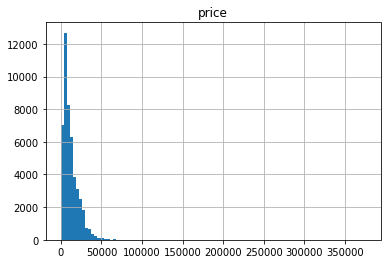

In [263]:
hist_func('price') # Looks at distribution of the data 

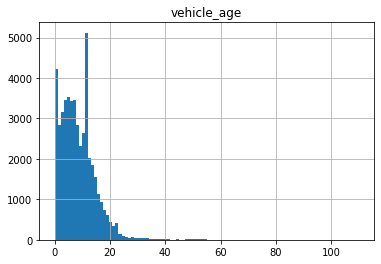

In [264]:
hist_func('vehicle_age') # Looks at distribution of the data 

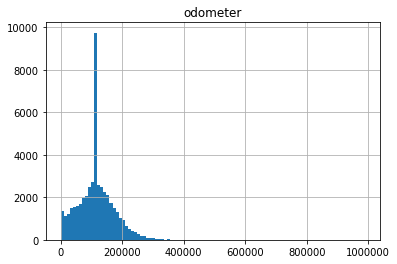

In [265]:
hist_func('odometer') # Looks at distribution of the data 


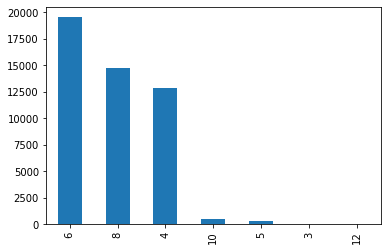

In [266]:
car_data['cylinders'].value_counts().plot(kind='bar'); # Looks at distribution of the data 


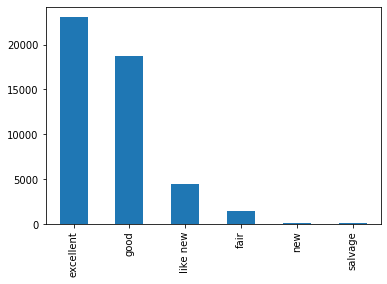

In [267]:
car_data['condition'].value_counts().plot(kind='bar'); # Looks at distribution of the data 

**Initial Observations on Data Distribution**
* The majority of cars are priced at under 20,000 with the largest spikes under 10,000
* The car age skews toward newer cars under 10 years old
* The majority of cars have mileage under 200,000 miles. There is a strange spike of cars around 115,000 miles that will need to be investigated.
* The majority of cars had 6 cylinders, followed by 8 and 4. Very few cars had 5, 3 or 12 cylinders. 
* The majority of cars are in excellent and good condition.

## Study and treat outliers

**Distribution**

Looks at distribution of the following factors, using the describe function and histograms:
* Price
* Odometer
* Days listed
* Vehicle age
* Average mileage

**Treating Outliers: Price**

In [268]:
car_data['price'].describe() # Looks at the lower and higher limits for outliers 

count     47906.000000
mean      12160.465203
std       10082.453773
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

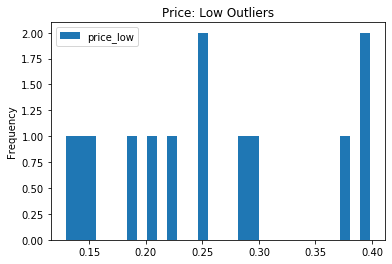

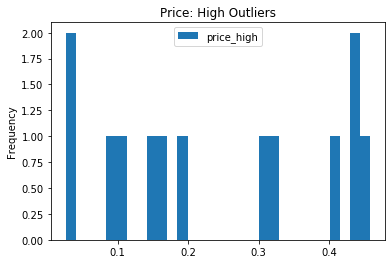

In [269]:
car_data['price_low'] = car_data['price'] < 5000 # Creates a column that indicates if the price is a low outlier

price_low_table = car_data.pivot_table(index='type', values='price_low') # Creates a new dataframe that looks at the mean number of low outliers per vehicle type

price_low_table.sort_values(by='price_low', ascending = False) # Looks at a table of the mean values 

price_low_table.plot(bins=30, title='Price: Low Outliers', kind='hist'); # Creates a histogram of the mean values 

car_data['price_high'] = car_data['price'] > 16900 # Creates a column that indicates if the price is a high outlier

price_high_table = car_data.pivot_table(index='type', values='price_high') # Creates a new dataframe that looks at the mean number of high outliers per vehicle type

price_high_table.sort_values(by='price_high', ascending = False) # Looks at a table of the mean values 

price_high_table.plot(bins=30, title='Price: High Outliers', kind='hist');  # Creates a histogram of the mean values

In [270]:
# Store data without outliers in a separate DataFrame

car_data_price = car_data.query('5000 < price < 16900') # Creates a new dataframe without outliers in price

car_data_good = car_data.query('5000 < price < 16900') # Creates a new dataframe where we will store the data without any outliers

**Price Outliers**
* The outliers are unevenly distributed among vehicle types. 
* Low outliers are distributed among hatchbacks, sedans and mini-vans (over 35%)
* High outliers are disproportionately attributed to buses, trucks, pickups, and coupes (over 35% of the data)

**Treating Outliers: Odometer**

In [271]:
car_data['odometer'].describe() # Looks at the lower and higher limits for outliers 

count     47906.000000
mean     115053.673632
std       60019.830639
min           0.000000
25%       79000.000000
50%      113000.000000
75%      146327.000000
max      990000.000000
Name: odometer, dtype: float64

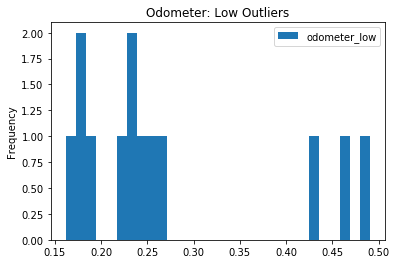

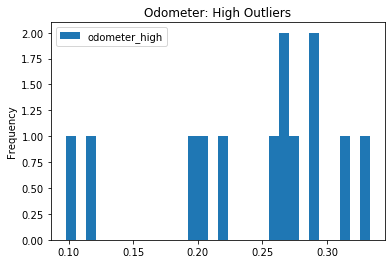

In [272]:
car_data['odometer_low'] = car_data['odometer'] < 79000 # Creates a column that indicates if the price is a low outlier

odometer_low_table = car_data.pivot_table(index='type', values='odometer_low') # Creates a new dataframe that looks at the mean number of low outliers per vehicle type

odometer_low_table.sort_values(by='odometer_low', ascending = False) # Looks at a table of the mean values 

odometer_low_table.plot(bins=30, title='Odometer: Low Outliers', kind='hist'); # Creates a histogram of the mean values 

car_data['odometer_high'] = car_data['odometer'] > 146327 # Creates a column that indicates if the price is a high outlier

odometer_high_table = car_data.pivot_table(index='type', values='odometer_high') # Creates a new dataframe that looks at the mean number of high outliers per vehicle type

odometer_high_table.sort_values(by='odometer_high', ascending = False) # Looks at a table of the mean values 

odometer_high_table.plot(bins=30, title='Odometer: High Outliers', kind='hist'); # Creates a histogram of the mean values ;  # Creates a histogram of the mean values 

In [273]:
car_data_odometer = car_data.query('7900 < odometer < 146327') # Creates a new dataframe without outliers in odometer

car_data_good = car_data_good.query('5000 < price < 16900') # Creates a new dataframe where we will store the data without any outliers

**Odometer Outliers**
* The outliers are unevenly distributed among vehicle types. 
* Low outliers are distributed among coupes, buses and convertibles (over 35%).
* High outliers are disproportionately attributed to buses and minivans at nearly a third of the data. 

**Treating Outliers: Days Listed**

In [274]:
car_data['days_listed'].describe() # Looks at the lower and higher limits for outliers 

count    47906.000000
mean        39.564835
std         28.201967
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

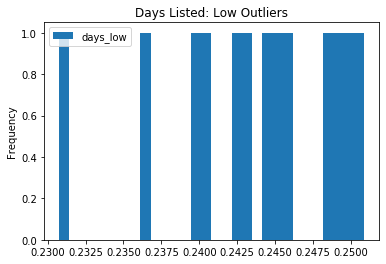

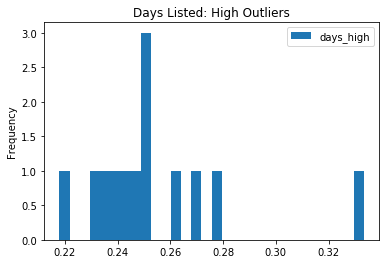

In [275]:
car_data['days_low'] = car_data['days_listed'] < 19 # Creates a column that indicates if the price is a low outlier

days_low_table = car_data.pivot_table(index='type', values='days_low') # Creates a new dataframe that looks at the mean number of low outliers per vehicle type

days_low_table.sort_values(by='days_low', ascending = False) # Looks at a table of the mean values 

days_low_table.plot(bins=30, title='Days Listed: Low Outliers', kind='hist'); # Creates a histogram of the mean values 

car_data['days_high'] = car_data['days_listed'] > 53 # Creates a column that indicates if the price is a high outlier

days_high_table = car_data.pivot_table(index='type', values='days_high') # Creates a new dataframe that looks at the mean number of high outliers per vehicle type

days_high_table.sort_values(by='days_high', ascending = False) # Looks at a table of the mean values 

days_high_table.plot(bins=30, title='Days Listed: High Outliers', kind='hist');  # Creates a histogram of the mean values 

In [276]:
car_data_days = car_data.query('19 < days_listed < 53') # Creates a new dataframe without outliers in days listed

car_data_good = car_data_good.query('19 < days_listed < 53') # Creates a new dataframe where we will store the data without any outliers

**Days Listed Outliers**
* The low outliers are evenly distributed across vehicle types. 
* Buses were most likely to have high outliers (about a third of the data).

**Treating Outliers: Vehicle Age**

In [277]:
car_data['vehicle_age'].describe() # Looks at the lower and higher limits for outliers 

count    47906.000000
mean         8.556966
std          6.295266
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

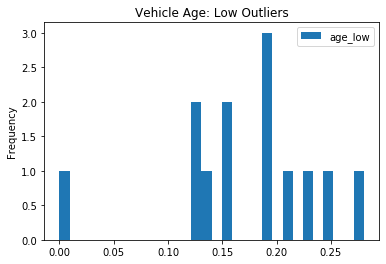

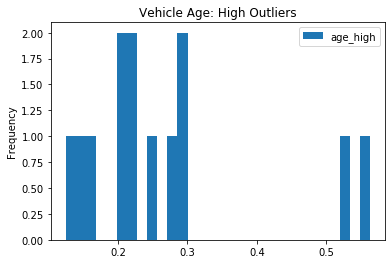

In [322]:
car_data['age_low'] = car_data['vehicle_age'] < 4 # Creates a column that indicates if the price is a low outlier

age_low_table = car_data.pivot_table(index='type', values='age_low') # Creates a new dataframe that looks at the mean number of low outliers per vehicle type

age_low_table.sort_values(by='age_low', ascending = False) # Looks at a table of the mean values 

age_low_table.plot(bins=30, title='Vehicle Age: Low Outliers', kind='hist'); # Creates a histogram of the mean values 

car_data['age_high'] = car_data['vehicle_age'] > 12 # Creates a column that indicates if the price is a high outlier

age_high_table = car_data.pivot_table(index='type', values='age_high') # Creates a new dataframe that looks at the mean number of high outliers per vehicle type

age_high_table.sort_values(by='age_high', ascending = False) # Looks at a table of the mean values 

age_high_table.plot(bins=30, title='Vehicle Age: High Outliers', kind='hist');  # Creates a histogram of the mean values 

In [279]:
car_data_vehicle = car_data.query('4 < vehicle_age < 12') # Creates a new dataframe without outliers in vehicle age

car_data_good = car_data_good.query('4 < vehicle_age < 12') # Creates a new dataframe where we will store the data without any outliers

**Vehicle Age Outliers**
* The outliers are unevenly distributed among vehicle types. 
* Buses, offroads, convertibles, wagons and vans were more likely to have ads listed for very little time.
* High outliers are disproportionately attributed to convertibles and offroads.

**Treating Outliers: Average Mileage**

In [280]:
car_data['avg_mileage'].describe() # Looks at the lower and higher limits for outliers 

count     47906.000000
mean      17763.053626
std       15462.635236
min           0.000000
25%        9675.500000
50%       14444.000000
75%       21325.500000
max      279365.000000
Name: avg_mileage, dtype: float64

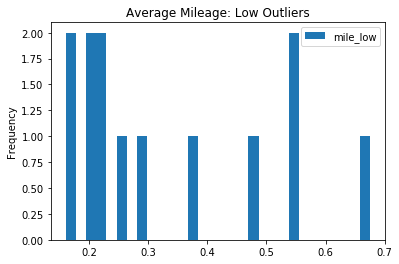

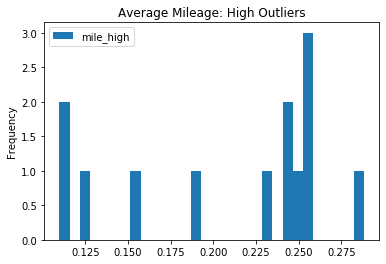

In [323]:
car_data['mile_low'] = car_data['avg_mileage'] < 9675 # Creates a column that indicates if the price is a low outlier

mile_low_table = car_data.pivot_table(index='type', values='mile_low') # Creates a new dataframe that looks at the mean number of low outliers per vehicle type

mile_low_table.sort_values(by='mile_low', ascending = False) # Looks at a table of the mean values 

mile_low_table.plot(bins=30, title='Average Mileage: Low Outliers', kind='hist'); # Creates a histogram of the mean values 

car_data['mile_high'] = car_data['avg_mileage'] > 21325 # Creates a column that indicates if the price is a high outlier

mile_high_table = car_data.pivot_table(index='type', values='mile_high') # Creates a new dataframe that looks at the mean number of high outliers per vehicle type

mile_high_table.sort_values(by='mile_high', ascending = False) # Looks at a table of the mean values 

mile_high_table.plot(bins=30, title='Average Mileage: High Outliers', kind='hist');  # Creates a histogram of the mean values 

In [282]:
car_data_mileage = car_data.query('9675 < avg_mileage < 21325') # Creates a new dataframe without outliers in mileage

car_data_good = car_data_good.query('9675 < avg_mileage < 21325') # Creates a new dataframe where we will store the data without any outliers

**Average mileage outliers**
* The outliers are unevenly distributed among vehicle types. 
* Low outliers are disproportionately attributed to convertibles, offroads, buses and coupes.
* High outliers are less likely to be attributed to to convertibles, offroads, buses, coupes and other vehicle type.

## Study core parameters without outliers

**Comparing Price**

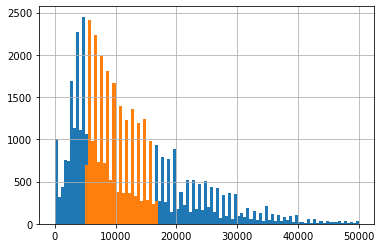

In [283]:
car_data['price'].hist(bins=100, range=(0,50000))

car_data_price['price'].hist(bins=100, range=(0,50000));

**Observations about Price**
* The most common prices are close to the numbers rounded to the nearest 10,000, which makes sense from a marketing standpoint. 
* The biggest peaks is for cars priced around $6,000. 


**Comparing Odometer**

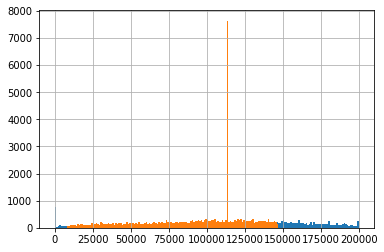

In [284]:
car_data['odometer'].hist(bins=200, range=(0,200000));

car_data_odometer['odometer'].hist(bins=200, range=(0,200000));

In [285]:
car_data_odometer['odometer'].value_counts()

113000    7436
140000     169
130000     162
120000     160
110000     116
          ... 
103329       1
84890        1
117642       1
25471        1
108677       1
Name: odometer, Length: 11714, dtype: int64

In [286]:
car_data_odometer_large = car_data_odometer.query('odometer == 113000') # Pulls out rows for which the odometer is 113,000

car_data_odometer_large.describe() # Looks at the descriptive statistics for the table that has only the rows for cars with a mileage of 113,000

car_data_odometer_large['model'].value_counts() # Looks at a count of all the different car models

car_data_odometer_large['type'].value_counts() # Looks at a count of the car type

car_data_odometer_large['transmission'].value_counts() # Looks at a count of transmission types 

automatic    6770
manual        406
other         260
Name: transmission, dtype: int64

**Observations about Odometer**
* From the histogram, it looks like there is very large spike of cars with mileage around 115,000.
* From checking the data more closely, 1,018 cars having a mileage of 113,000 which far exceeds any other mileage (the second most common mileage is 130,000 with only 30 cars). 
* This seems a little strange and warrented further investigation. I took a look at only the rows for the cars with a current mileage of 113,000. There was no clear pattern to which cars had a mileage of 113,000. 


**Comparing Days Listed**

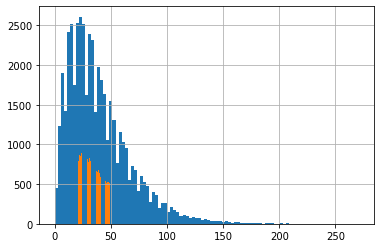

In [287]:
car_data['days_listed'].hist(bins=100);

car_data_days['days_listed'].hist(bins=100);

**Observations about Days Listed**
* The distribution of days listed is fairly even from 20 to 50 days.
* The number of ads decreased slightly as days went up. 

**Comparing Vehicle Age**

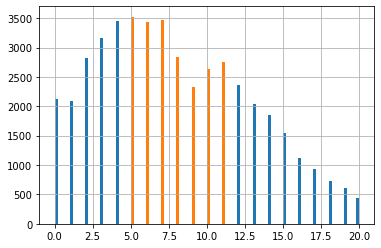

In [288]:
car_data['vehicle_age'].hist(bins=100, range=(0,20));

car_data_vehicle['vehicle_age'].hist(bins=100, range=(0,20));

**Observations about Vehicle Age**
* The majority of vehicles are between the ages of 5 and 11, peaking between 5 and 7 years old. 

**Comparing Average Mileage**

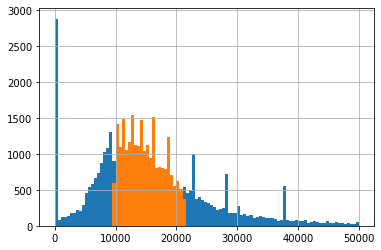

In [289]:
car_data['avg_mileage'].hist(bins=100, range=(0,50000));

car_data_mileage['avg_mileage'].hist(bins=100, range=(0,50000));

In [290]:
car_data_mileage['avg_mileage'].value_counts()

18833.0    546
16143.0    545
11300.0    431
10273.0    413
14125.0    399
          ... 
14987.0      1
10110.0      1
17927.0      1
14725.0      1
19975.0      1
Name: avg_mileage, Length: 7177, dtype: int64

**Initial observations**
* The average mileage has several peaks, the highest being around 160,000 miles. 

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

In [291]:
car_data['days_listed'].describe() # Looks at basic statistics of the days_listed column, including the mean, median and the quantiles

count    47906.000000
mean        39.564835
std         28.201967
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

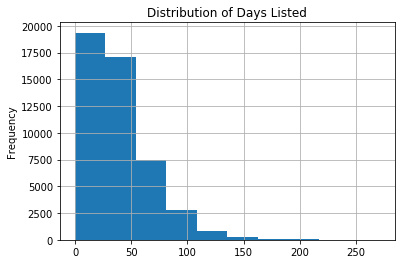

In [325]:
car_data['days_listed'].plot(grid=True, title='Distribution of Days Listed', kind='hist'); # Looks at the distribution of days listed in the data 

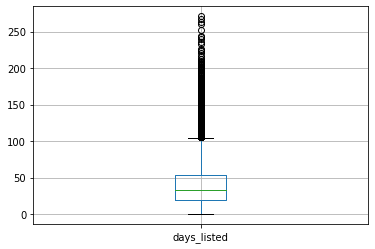

In [293]:
car_data.boxplot('days_listed'); # Looks at the distribution of days listed in the data 

In [294]:
car_data_low = car_data.query('days_listed < 19') # Looks at only the data for ads that were removed quickly determined by the first quartile

car_data_low.head() # Looks at a snapshot of the cars whose adds were removed quickly

car_data.describe() # Looks at overall statistics for the original dataframe

car_data_low.describe() # Looks at the overall statistics for the dataframe that includes only ads that were removed quickly

car_data_low['date_posted_year'].min() # Looks at first year for the date these ads were posted

car_data_low['cylinders'].value_counts() # Looks at the count of cars by number of cylinders

car_data_low['condition'].value_counts() # Looks at the count of cars by car condition

car_data_low['transmission'].value_counts() # Looks at the count of cars by number of transmission type

car_data_low['model_year'].value_counts() # Looks at the count of cars by model

2013    861
2015    847
2014    829
2012    808
2011    802
       ... 
1984      1
1962      1
1970      1
1960      1
1936      1
Name: model_year, Length: 61, dtype: int64

In [295]:
car_data['quick_ads'] = car_data['days_listed'] < 19

car_data_quick = car_data.pivot_table(index='type', values='quick_ads')

car_data_quick.sort_values(by='quick_ads', ascending=False)

,quick_ads
type,
van,0.250842
bus,0.250000
wagon,0.249476
truck,0.248242
sedan,0.245799
offroad,0.245098
coupe,0.244671
convertible,0.243437
hatchback,0.242300


**Observations on cars of ads removed quickly**
* Ads removed quickly is defined by ads that were listed for less than 19 days (the first quartile)
* The majority of the ads that were removed quickly were for cas with 6 cylinders, in excellent and good condition,  automatic transmission, and model years 2011-2015.
* Quick ads were evenly distributed across model type. 

In [296]:
car_data_high = car_data.query('days_listed > 53')

car_data_high.head() # Looks at a snapshot of the cars whose adds were listed the longest

car_data.describe()

car_data_high.describe()

car_data_high['cylinders'].value_counts() # Looks at the count of cars by number of cylinders

car_data_high['condition'].value_counts() # Looks at the count of cars by number of car condition

car_data_high['transmission'].value_counts() # Looks at the count of cars by number of transmission type

car_data_high['model_year'].value_counts() # Looks at the count of cars by model 

2012    903
2014    872
2013    871
2011    843
2015    801
2008    741
2016    711
2010    685
2007    643
2017    596
2006    560
2018    528
2009    526
2005    484
2004    433
2003    344
2002    264
2001    206
2000    182
1999    129
2019     96
1998     92
1997     82
1995     42
1996     42
1994     29
1993     25
1990     18
1992     17
1989     16
1988     13
1991     10
1987      9
1986      8
1984      7
1985      7
1966      6
1977      6
1964      4
1969      4
1972      4
1965      3
1973      3
1968      3
1971      3
1979      3
1980      3
1975      2
1970      2
1982      2
1974      2
1978      2
1929      1
1967      1
1962      1
1981      1
1955      1
1976      1
1963      1
1960      1
Name: model_year, dtype: int64

In [297]:
car_data['long_ads'] = car_data['days_listed'] > 53

car_data_long = car_data.pivot_table(index='type', values='long_ads')

car_data_long.sort_values(by='long_ads', ascending=False)

,long_ads
type,
bus,0.333333
hatchback,0.276181
offroad,0.269608
van,0.262626
SUV,0.252394
wagon,0.250175
truck,0.249544
sedan,0.246772
pickup,0.243060


**Observations on cars of ads that remained up for a long time**
* Ads that were up for a long time  is defined by ads that were listed for more than 53 days (the fourth quartile)
* The majority of the ads that were up for a long time were for cas with 6 cylinders, in excellent and good condition,  automatic transmission, and model years 2011-2015.
* Long ads were mostly evenly distributed across model types, although slightly more likely to be buses. 

## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

In [298]:
print(car_data.pivot_table(index='type', values='price').sort_values(by='price', ascending=False))# Looks at mean price of cars by vehicle type 

print(car_data_price.pivot_table(index='type', values='price').sort_values(by='price', ascending=False))# Looks at mean price of cars by vehicle type excluding price outliers


                    price
type                     
bus          17135.666667
truck        16753.880090
pickup       16169.763880
convertible  14448.930788
coupe        14340.695551
offroad      14227.946078
SUV          11162.924256
other        10873.666667
van          10286.612795
wagon         9089.562544
mini-van      8145.328372
sedan         6995.972758
hatchback     6892.285421
                    price
type                     
truck        10973.670576
convertible  10712.715686
pickup       10448.618919
coupe        10432.099863
offroad      10159.826923
SUV           9944.024908
other         9731.673611
wagon         9535.784223
van           9291.433846
mini-van      9175.700535
sedan         9005.356799
hatchback     8526.695971
bus           8423.875000


In [299]:
truck_data = car_data_price.query('type == "truck"') # Creates a dataframe with only the vehicle type truck using the dataframe without outliers

SUV_data = car_data_price.query('type == "SUV"') # Creates a dataframe with only the vehicle type SUV using the dataframe without outliers

In [300]:
truck_data.shape

SUV_data.shape

(6263, 22)

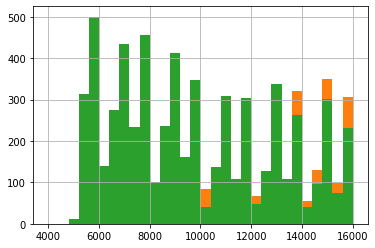

In [301]:
car_data_good['price'].hist(bins=30, range=(4000,16000)); # Looks at the distribution of price 

truck_data['price'].hist(bins=30, range=(4000,16000)); # Looks at the distribution of price 

SUV_data['price'].hist(bins=30, range=(4000,16000)); # Looks at the distribution of price 

**Obervations on vehicle type compared to price**
* Trucks, convertibles and pickups are the most expensive cars on average, after accounting for outliers. 
* After accounting for outliers, buses moved from the most expensive to the least expensive vehicle type on average. This makes sense based on what we saw earlier around there being high price outliers for buses. 
* Trucks and SUVs have 4000-6000 ads each. 
* I checked the distribution of price ranges for trucks and SUVs compared to the entire dataset to make sure we could look at trucks and SUVs as representations of the data. 

## Price factors

The following section will examine what factors impact the price most out of five parameters: age, mileage, condition, transmission type, and color. Since we know from the previous section that trucks and SUVs are representative of the larger sample, we'll us those two vehicle types to look at the correlations.

**Price and transmission type**

In [302]:
truck_data.pivot_table(index='transmission', values='price', aggfunc='count') # Checks to make sure there are at least 50 ads for each type

,price
transmission,
automatic,4629
manual,195
other,36


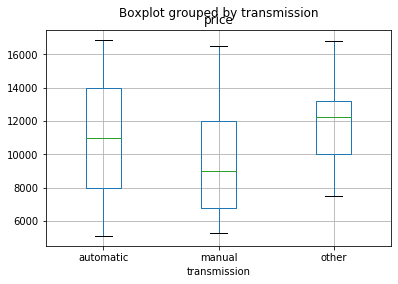

In [327]:
truck_data.boxplot(column='price', by='transmission');

In [304]:
SUV_data.pivot_table(index='transmission', values='price', aggfunc='count') # Checks to make sure there are at least 50 ads for each type

,price
transmission,
automatic,5940
manual,269
other,54


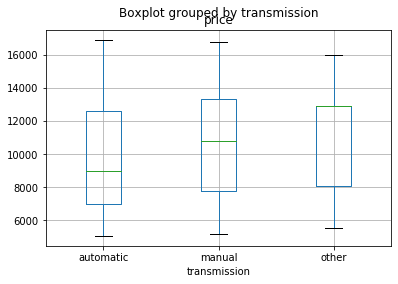

In [328]:
SUV_data.boxplot(column='price', by='transmission');

*Price and transmission*
* Price was not impacted by transmission type. 
* While the price range varied per transmission type, the median remained within a close range. 

**Price and paint color**

In [329]:
truck_data.pivot_table(index='paint_color', values='price', aggfunc='count').sort_values(by='price') # Checks to make sure there are at least 50 ads for each type

truck_data_good = truck_data.query('paint_color != ["purple", "yellow", "orange"]') # Creates a new dataframe without the paint colors that do not have at least 50 ads

truck_data_good['paint_color'].unique() # Checks to make sure the paint colors without 50 ads have been removed 

array(['red', 'black', 'custom', 'grey', 'white', 'silver', 'blue',
       'unknown', 'green', 'brown'], dtype=object)

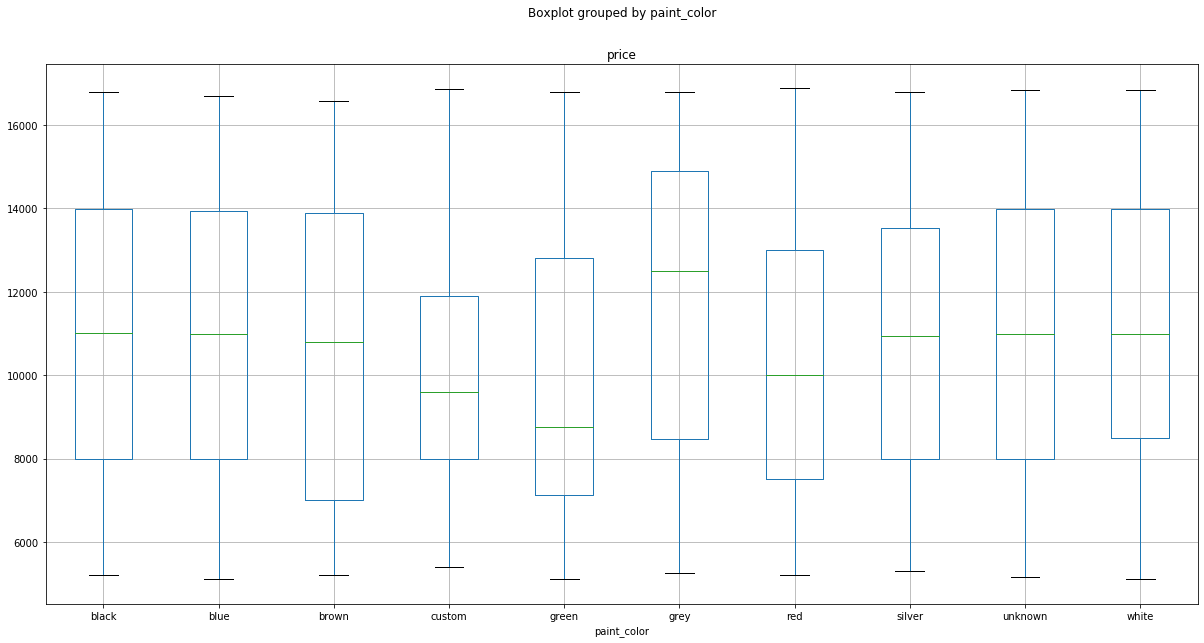

In [332]:
truck_data_good.boxplot(column='price', by='paint_color', figsize=(20, 10));

In [308]:
SUV_data.pivot_table(index='paint_color', values='price', aggfunc='count').sort_values(by='price') # Checks to make sure there are at least 50 ads for each type

SUV_data_good = truck_data.query('paint_color != ["purple", "yellow", "orange"]')

SUV_data_good['paint_color'].unique()

array(['red', 'black', 'custom', 'grey', 'white', 'silver', 'blue',
       'unknown', 'green', 'brown'], dtype=object)

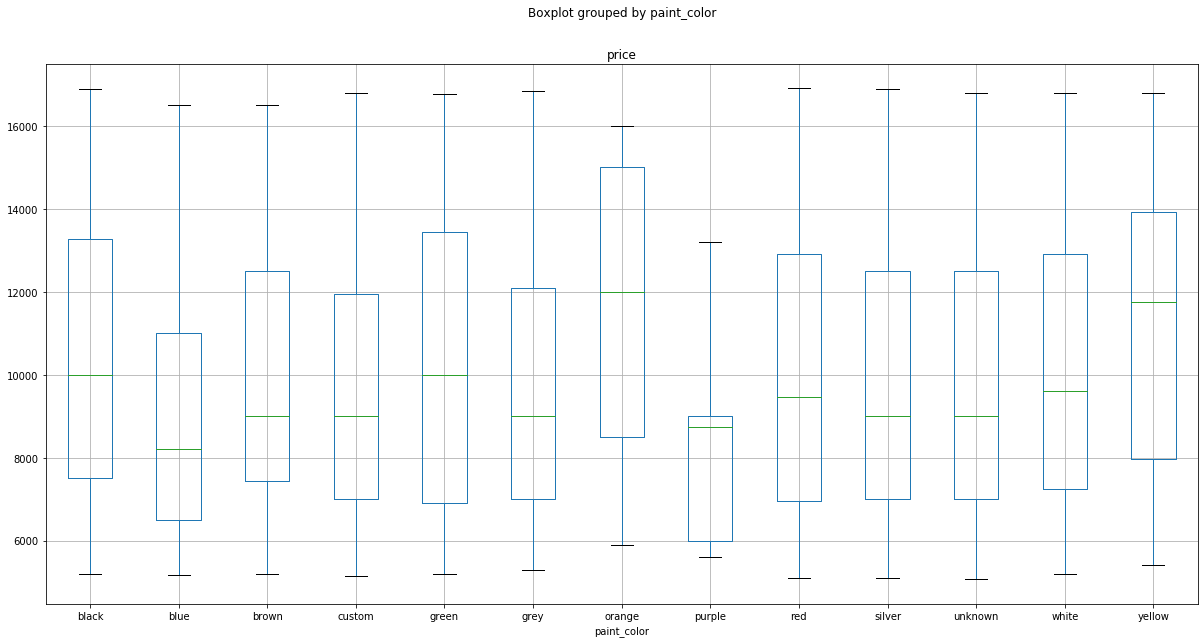

In [333]:
SUV_data_good.boxplot(column='price', by='paint_color', figsize=(20, 10));

*Price and paint color*
* Vehicles that are grey tend to be priced higher, while cars that are green are priced lower. 

**Price and Condition**

In [310]:
truck_data.pivot_table(index='condition_new', values='price', aggfunc='count').sort_values(by='price') # Checks to make sure there are 50 ads per category

truck_data_good = truck_data.query('condition_new != ["0","5"]') # Creates a new dataframe that elimates the categories without 50 ads

truck_data_good['condition_new'].unique() # Checks to make sure these categories have been removed

array(['4', '2', '3', '1'], dtype=object)

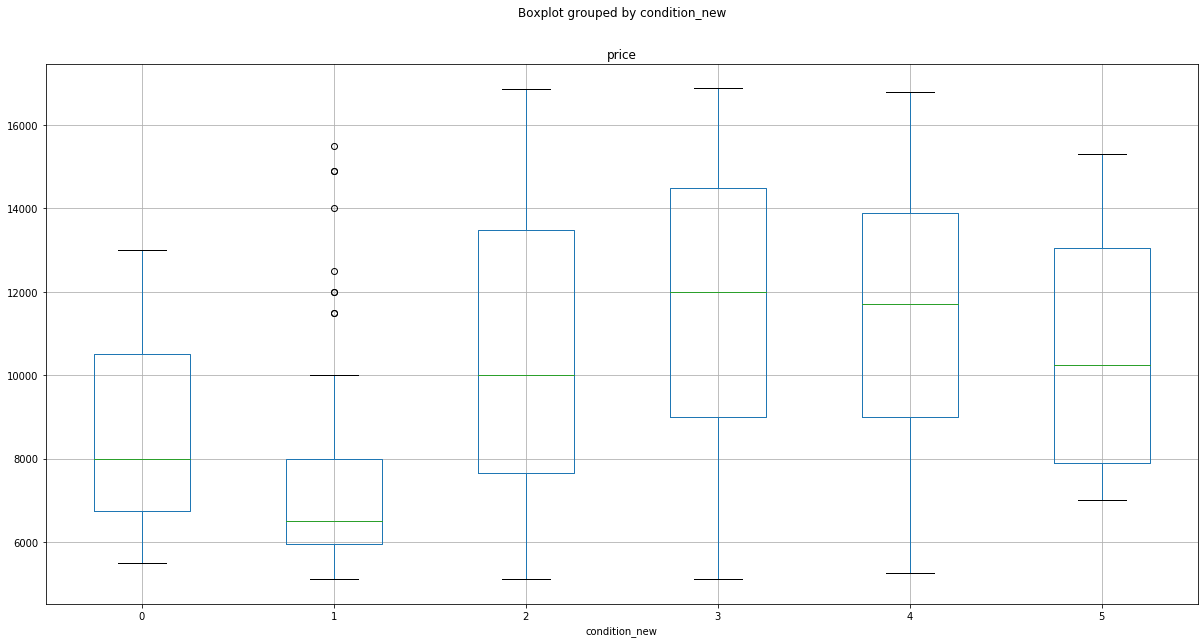

In [334]:
truck_data_good.boxplot(column='price', by='condition_new', figsize=(20, 10));

In [312]:
SUV_data.pivot_table(index='condition_new', values='price', aggfunc='count').sort_values(by='price') # Checks to make sure there are 50 ads per category

SUV_data_good = SUV_data.query('condition_new != ["0","1","5"]') # Creates a new dataframe that elimates the categories without 50 ads

SUV_data_good['condition_new'].unique() # Checks to make sure these categories have been removed

array(['2', '3', '4'], dtype=object)

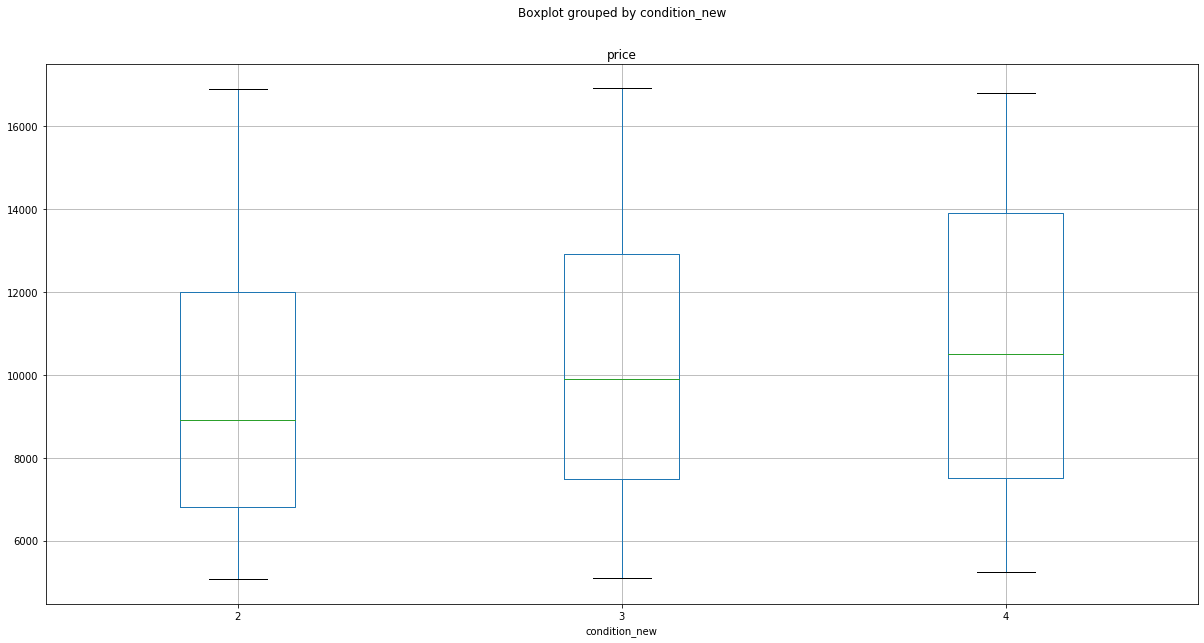

In [335]:
SUV_data_good.boxplot(column='price', by='condition_new', figsize=(20, 10));

*Price and Condition*
* Vehicles in fair and good condition are priced lower. 


**Price and Mileage**

In [314]:
truck_data['price'].corr(truck_data['avg_mileage'])

0.20942629739036184

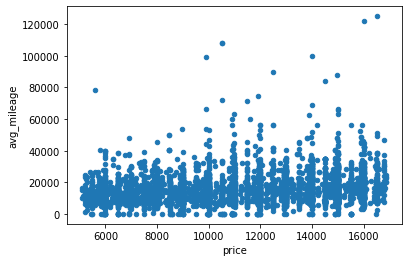

In [315]:
truck_data.plot(x='price', y='avg_mileage', kind='scatter'); # Creates a scatterplot looking at the correlation between mileage and price 

In [316]:
SUV_data['price'].corr(SUV_data['avg_mileage'])

0.2474968706386581

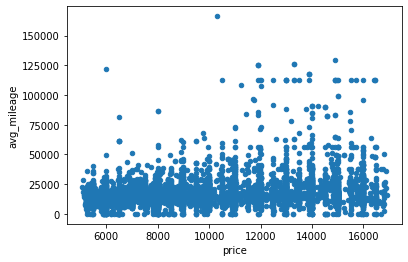

In [317]:
SUV_data.plot(x='price', y='avg_mileage', kind='scatter'); # Creates a scatterplot looking at the correlation between mileage and price 

*Price and average mileage*
* There is a mild positive association between mileage and price (the higher the average mileage per year, the higher the price). 


**Price and Vehicle Age**

In [318]:
truck_data['price'].corr(truck_data['vehicle_age'])

-0.4524516890577514

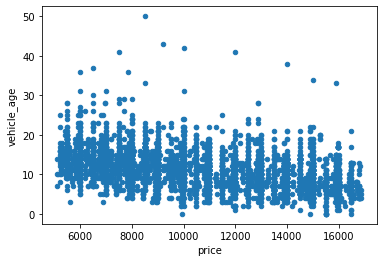

In [319]:
truck_data.plot(x='price', y='vehicle_age', kind='scatter'); # Creates a scatterplot looking at the correlation between vehicle age and price 

In [320]:
SUV_data['price'].corr(SUV_data['vehicle_age'])

-0.4113394848476518

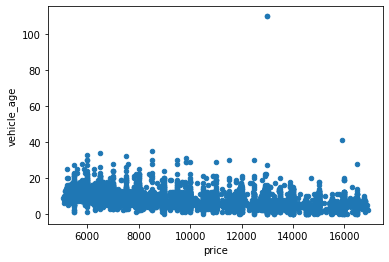

In [321]:
SUV_data.plot(x='price', y='vehicle_age', kind='scatter'); # Creates a scatterplot looking at the correlation between vehicle age and price 

*Price and vehicle age**
* The older the vehicle gets, the more likely the price is to be lower. 

## General conclusion

**Missing Data**
Rows with missing values in the 'model_year' column were dropped.

Replaced the following missing values:
* In 'is_4wd' with '0' (indicating False or that the car is not 4wd)
* In 'paint_color' with 'unknown'
* In 'odometer' with the median (113,000)
* In 'cylinders' with the median (6)

**Fixed Data Types**
* Converted model_year, cylinders, odometer and is_4wd columns from floats to integer types.
* Converted the date_posted column to a datetimeobject.

**Additional data preparation**

Added the following columns: year, month and day of the week the ad was posted.
Calculated the car's age and mileage by year.
Created categories for the condition column.

**Conclusions**

Price is impaced by paint color, condition, average mileage and vehicle age. 

*Price and transmission*
* Price was not impacted by transmission type. 
* While the price range varied per transmission type, the median remained within a close range.

*Price and paint color*
* Vehicles that are grey tend to be priced higher, while cars that are green are priced lower. 

*Price and condition*
* Vehicles in fair and good condition are priced lower. 

*Price and average mileage*
* There is a mild positive association between mileage and price (the higher the average mileage per year, the higher the price). 

*Price and vehicle age**
* The older the vehicle gets, the more likely the price is to be lower. 